# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
df = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


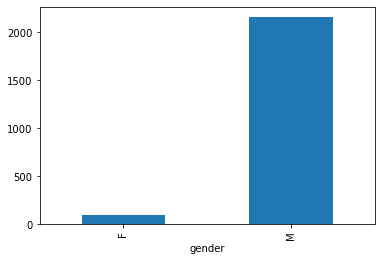

In [158]:
df.groupby('gender')['gender'].count().plot.bar();


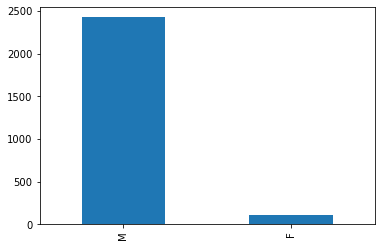

In [5]:
df.gender.value_counts().plot.bar();

In [6]:
# https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots 

In [7]:
# with pandas



In [8]:
y = df.gender.value_counts().values
x = df.gender.value_counts().index

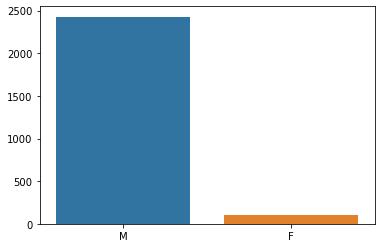

In [9]:
sns.barplot(x = df.gender.value_counts().index, y = df.gender.value_counts().values);

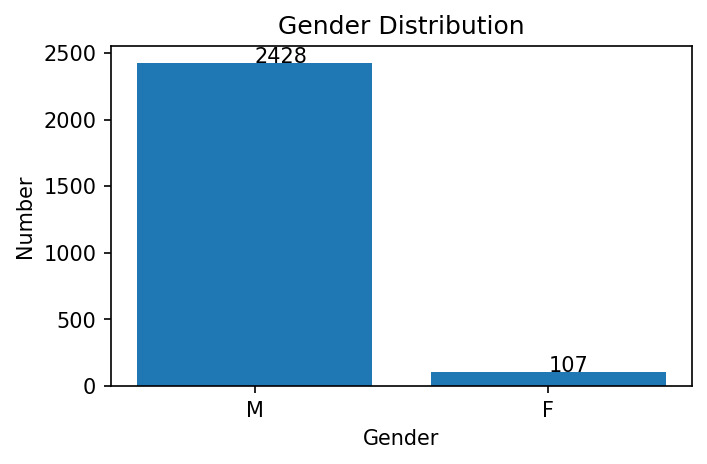

In [10]:
# with matplotlib
plt.figure(figsize=(5,3), dpi = 150)
plt.bar(x,y)
plt.xlabel('Gender')
plt.ylabel('Number')
plt.title('Gender Distribution')

for index, value in enumerate(y): # (0,2428)(1,107)
    plt.text(index, value, str(value))


## 2: Plot 7 most common kill weapons

In [11]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [12]:
y = df.armed.value_counts()[:7].values
x = df.armed.value_counts()[:7].index

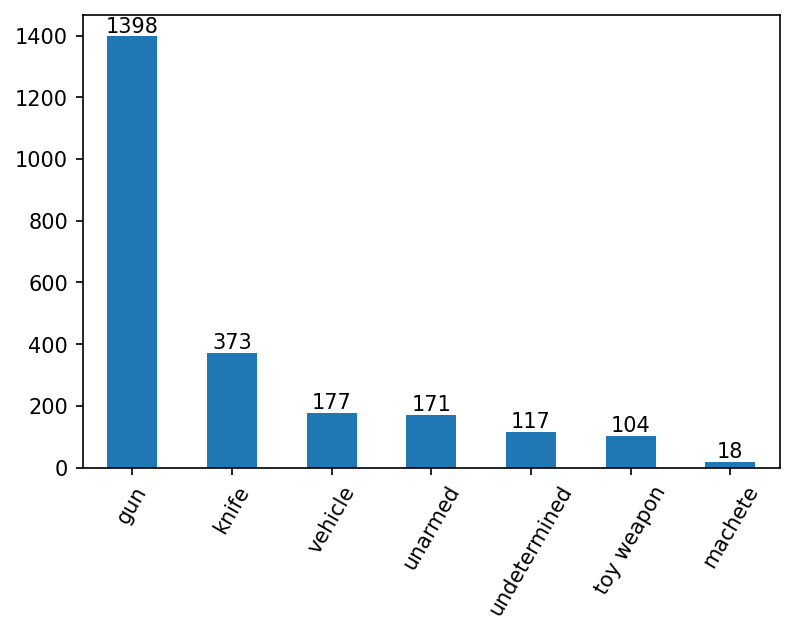

In [13]:
plt.figure(figsize=(6,4),dpi = 150)
df.armed.value_counts()[:7].plot.bar()
plt.xticks(rotation = 60);
for index, value in enumerate(y):
    plt.text(index,value,str(value),ha = 'center',va = "bottom")

In [14]:
# with pandas


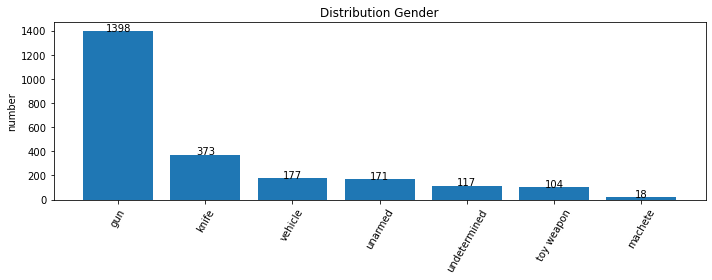

In [15]:
# with matplotlib
fig, ax = plt.subplots(figsize = (10,4))
ax.set_ylabel('number')
ax.set_title('Distribution Gender')
ax.bar(x,y)
plt.xticks(rotation = 60)
fig.tight_layout()
for index, value in enumerate(y):
    plt.text(index,value, str(value), ha = 'center')

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [16]:
old = df.age.dropna() <= 25

In [17]:
old.value_counts()

False    1905
True      553
Name: age, dtype: int64

In [18]:
old = pd.DataFrame(old)

In [19]:
old.value_counts()

age  
False    1905
True      553
dtype: int64

In [20]:
old.isnull().sum()

age    0
dtype: int64

In [21]:
old = old.dropna()

In [22]:
old

,age
0,False
1,False
2,True
3,False
4,False
...,...
2529,False
2530,False
2532,False
2533,False


In [23]:
old = old.replace({True:'below25', False:'Above25'})

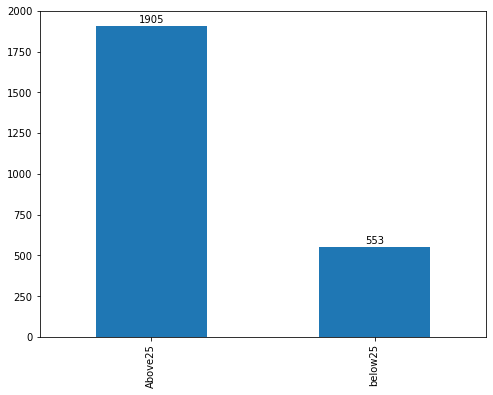

In [157]:
plt.figure(figsize=(8,6));
old.age.value_counts().plot.bar();
for index, value in enumerate(y):
    plt.text(index,value+20,str(value), ha = 'center')


In [25]:
old.value_counts()

age    
Above25    1905
below25     553
dtype: int64

In [26]:
# with pandas


In [27]:
x = old.age.value_counts().index

In [28]:
x

Index(['Above25', 'below25'], dtype='object')

In [29]:
y = old.age.value_counts().values

In [30]:
y

array([1905,  553], dtype=int64)

<BarContainer object of 2 artists>

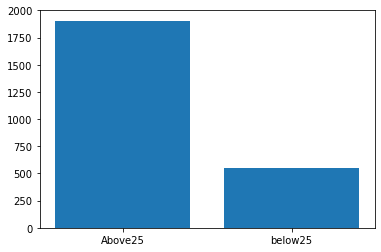

In [31]:
plt.bar(x,y)

In [32]:
# with matplotlib


## 4: Plot number of killed poeple by race

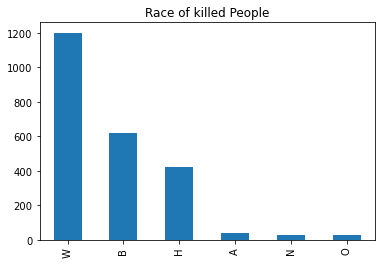

In [33]:
df.race.value_counts().plot.bar()
plt.title('Race of killed People');

In [34]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [35]:
# with pandas


Text(0.5, 1.0, 'Race of Killed People')

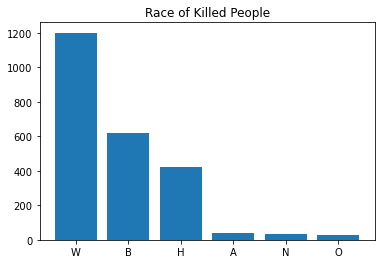

In [36]:
fig, ax = plt.subplots()
ax.bar(df.race.value_counts().index,df.race.value_counts().values)
ax.set_title('Race of Killed People')

In [37]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

<AxesSubplot:ylabel='race'>

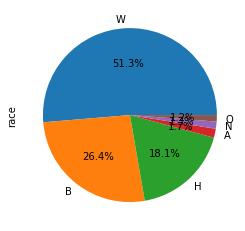

In [45]:
df.race.value_counts().plot.pie(autopct='%1.1f%%')

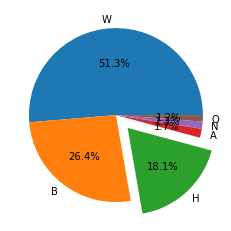

In [68]:
fig, ax = plt.subplots()
explode = (0, 0, 0.2, 0,0,0)
ax.pie(df.race.value_counts(),labels = df.race.value_counts().index, autopct='%1.1f%%',explode = explode);

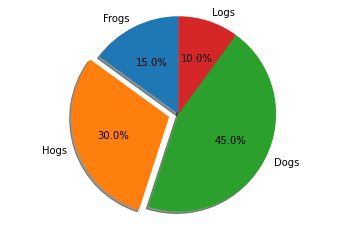

In [57]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [39]:
df.race.values

array(['A', 'W', 'H', ..., nan, 'B', 'B'], dtype=object)

In [40]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [70]:
df.dropna(inplace=True)

In [71]:
df.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [72]:
df.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [76]:
a = df.race.value_counts().index

In [75]:
b = df.race.value_counts().values

In [84]:
explode = (0, 0, 0.2, 0,0,0)
ax.pie(df.race.value_counts(),labels = df.race.value_counts().index, autopct='%1.1f%%',explode = explode);

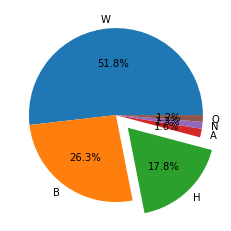

In [85]:

plt.pie(df.race.value_counts(),labels = df.race.value_counts().index, autopct='%1.1f%%',explode = explode);
explode = (0, 0, 0.2, 0,0,0)

In [42]:
# matplotlib



## 6: Most common 15 Name or Surname of killed people 

In [97]:
a = df.name.str.split()  # isimleri liste liste aldık

In [143]:
b = [j for i in a for j in i]

In [102]:
 # listeleri tek bir liste haline getirdik

In [103]:
c = {i:b.count(i) for i in set(b) }  # listenin elemanlarının countları ile sözlük yaptık

In [125]:
common_names = pd.Series(c).sort_values(ascending=False)[:15]  # sort edip indexledik

In [43]:
# Problem: TK TK is most probably not a name or surname. We will clean them.


In [148]:
common_names

Michael        82
David          53
James          47
Robert         44
Joseph         43
William        40
Daniel         40
Lee            37
John           36
Christopher    35
Richard        33
Smith          31
J.             30
Johnson        29
Joshua         27
dtype: int64

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape

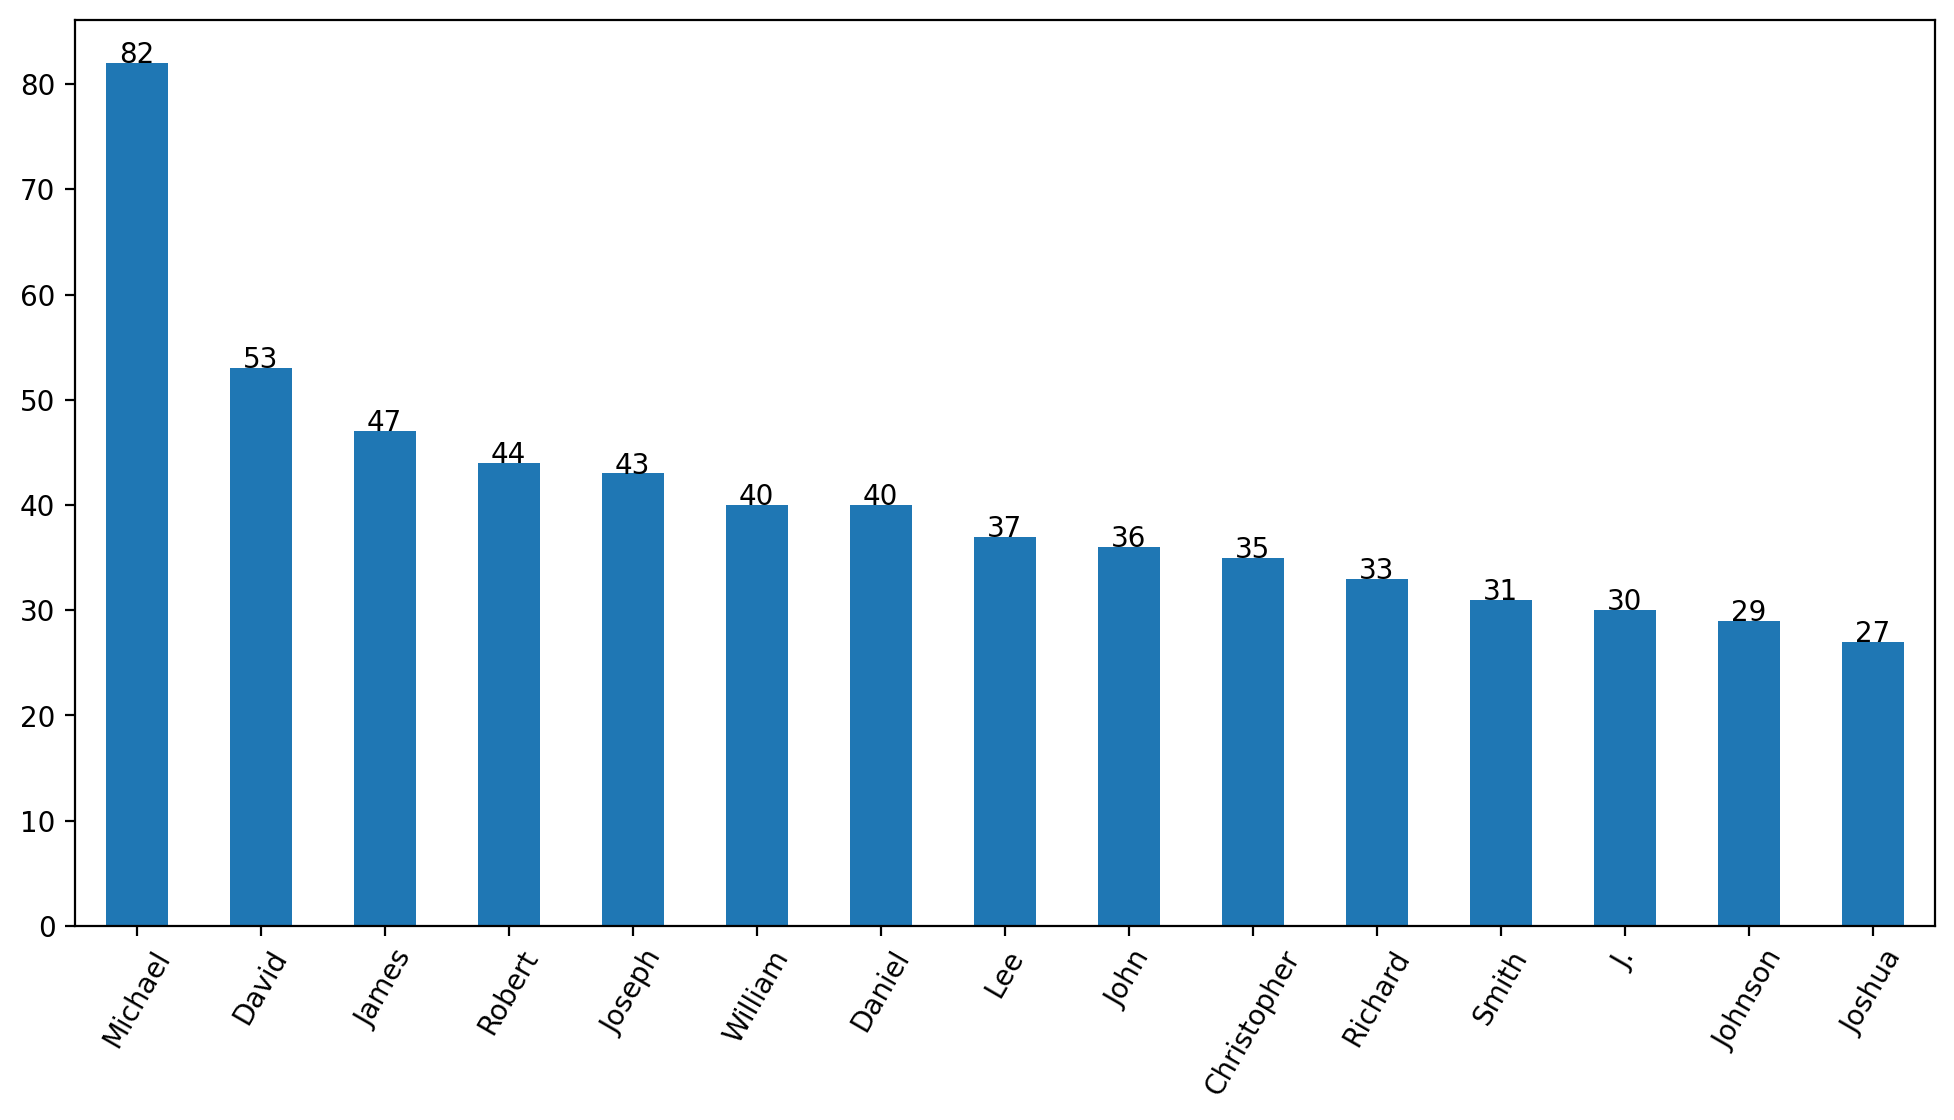

In [140]:
plt.figure(figsize=(12,6), dpi = 200)
common_names.plot.bar();
for index, value in enumerate(common_names.values):
    plt.text(index, value, str(value), ha = 'center')
plt.xticks(rotation = 60);

In [ ]:
# with pandas


In [ ]:
# with matplotlib


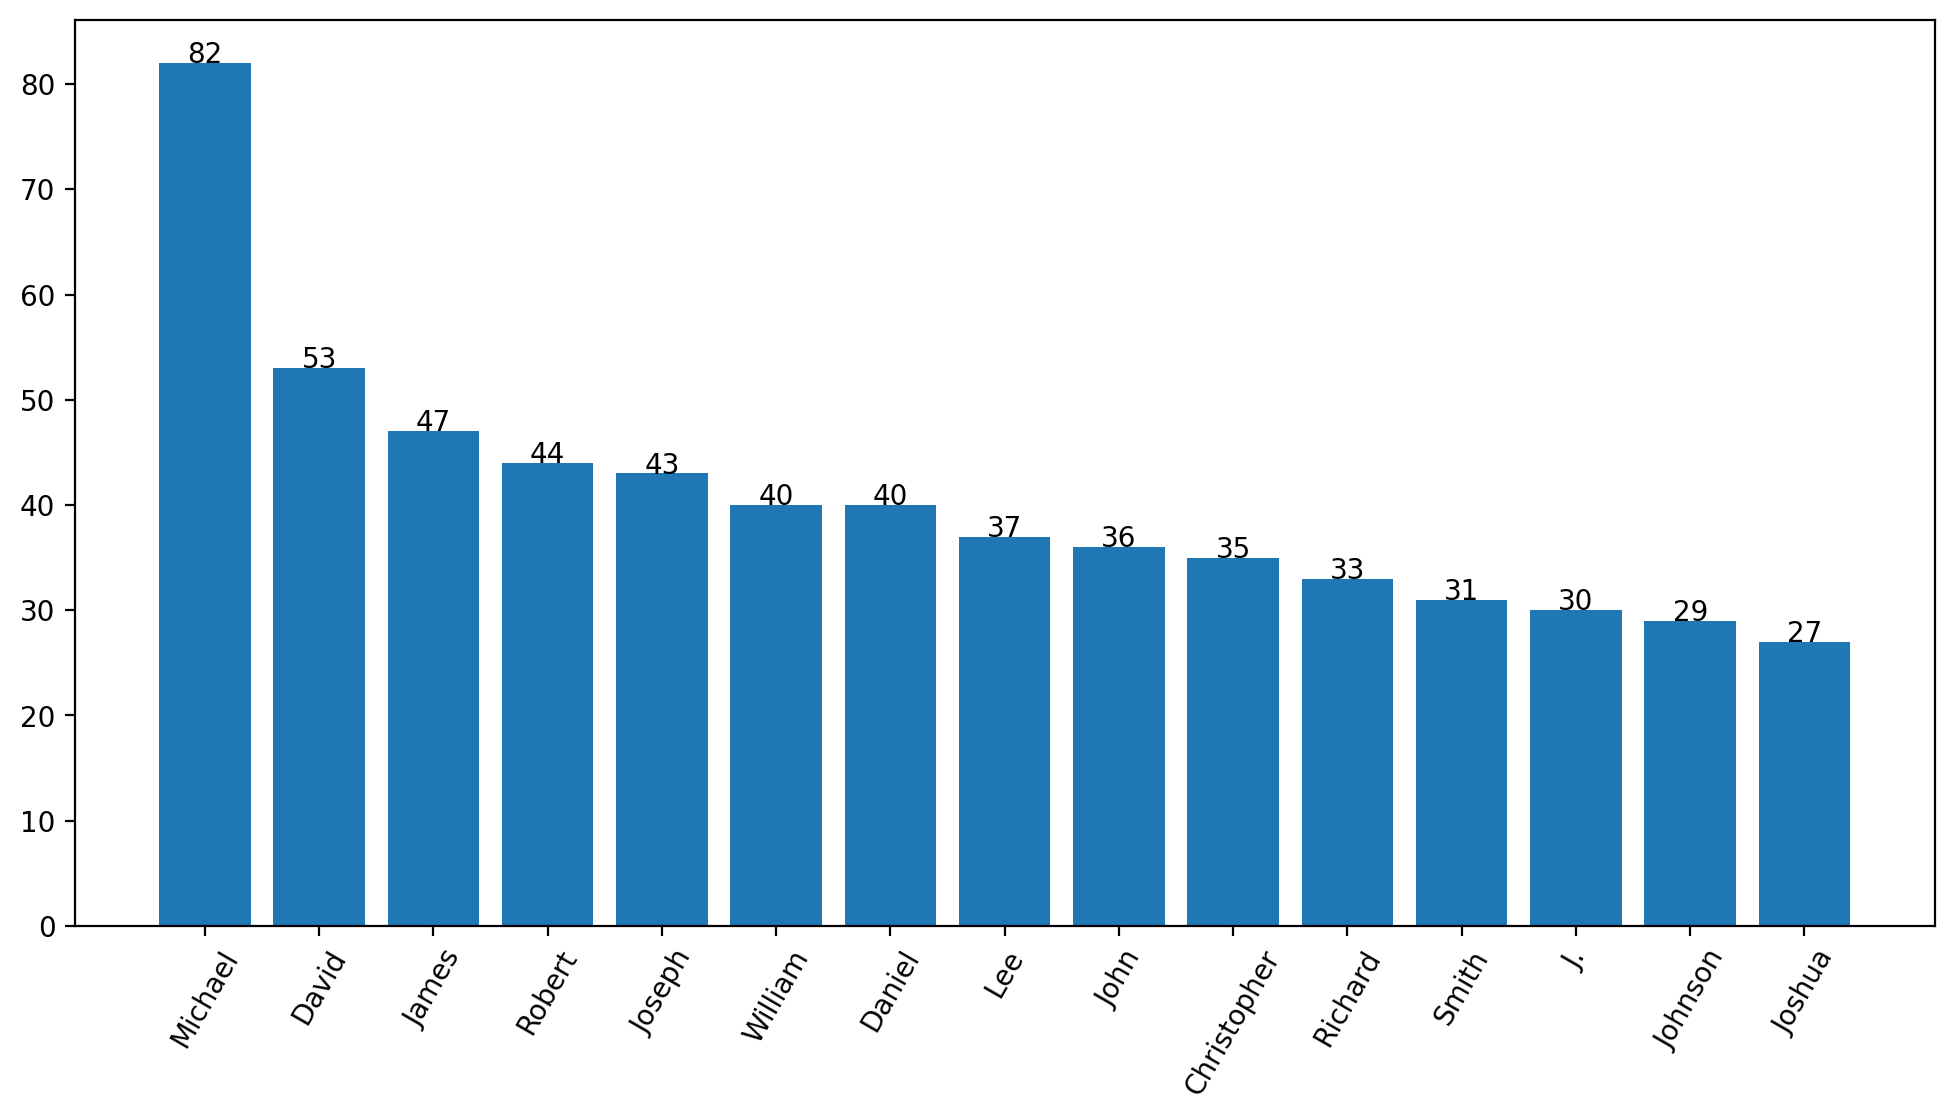

In [151]:
plt.figure(figsize=(12,6), dpi = 200)
plt.bar(common_names.index, common_names.values);
for index, value in enumerate(common_names.values):
    plt.text(index, value, str(value), ha = 'center')
plt.xticks(rotation = 60);